# Introduction to Neural Networks and Tensorflow/Keras

## Notes on the Theory

Some of the concepts sketched briefly in the introductory videos:

- Perceptron model
    - inputs, weights, bias, output
- Neural networks = Multilayer Perceptrons
    - fully connected layers
    - feed forward
    - input & output layers, hidden layers
    - deep if 2+ hiden layers
    - activation functions
    - Neural networks can approximate any convex continuous functions
        - proven by Zhou Lu and later by Boris Hanin
        - Wikipedia: Universal Approximation Theorem
- Activation functions
    - x, w, b, z
    - X, Z: several dimensions
    - map z = w*x+b to [0,1] region, or a similar region
    - a = sigmoid(z)
    - a = tanh(z)
    - a = relu(z)
        - good for vanishing gradient
    - the derivative of the activation functions is important
- Multi-class classification
    - non-exclusive: several classes possible
        - sigmoid used for all classes in output layer
        - each output neuron assigned to a class predicts independently
    - mutually exclusive: one class possible
        - softmax activation function used in output layer
    - one-hot encoding - dummy variables
- Cost Functions and Gradient Descend
    - we have labels y, and predictions
    - cost function: average difference between y & predictions
        - it depends on weights: C(w)
    - IMPORTANT Cost functions: RMSE, Cross-Entropy
    - minimum C value? descend in smalls steps in direction of maximum decrease: direction of gradient
        - if steps very small, slower descend
        - if steps too big, we miss minimum
    - stochastic gradient descend
    - Adam (2015): adaptive gradient descend
        - It works very well!
- Backpropagation
    - the gradient of the cost function is computed
    - with the chain rule as the multiplication of the derivatives of function along the feed forward flow
    - thus, the gradient of the cost function can be distributed in the network
- Tensorflow vs Keras
    - Keras is originally an API for several deep learning backends, for instance Tensorflow
    - Tensorflow 1.X had a complicated API, so it ended up manily being used with Keras - now Keras is the official API of Tensorflow!
    - Tensorflow 2.X improved the lower TF API, but Keras remains to be the main API


## Tensorflow Syntax Basics

### 1. Data Exploration & Preparation

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# We load a fake regression dataset
# Price needs to be predicted out of two fake features
# Goal: predict the price to sell something based on two features
df = pd.read_csv('../data/fake_reg.csv')

In [47]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


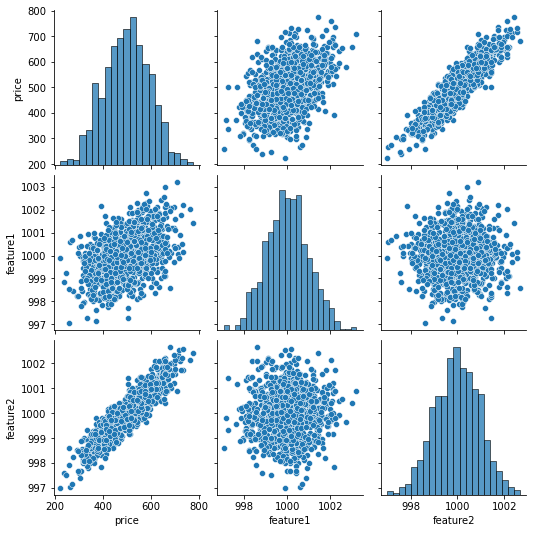

In [48]:
sns.pairplot(data=df)

In [49]:
# Train/Test split
from sklearn.model_selection import train_test_split

In [50]:
# As opposed to Scikit-Learn, TF needs numpy arrays -> .values
X = df[['feature1','feature2']].values
y = df['price'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train.shape

(700, 2)

In [53]:
X_test.shape

(300, 2)

In [54]:
# Normalize/Scale data
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
# Fit scaler only with the training split
scaler.fit(X_train)

MinMaxScaler()

In [57]:
# Scale the features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 2. Creating & Training the Neural Network using Keras

In [58]:
# We could use Keras and then a custom backend
# BUT: here we use Tensorflow and its default API: Keras
# Models (Sequential) contain Layers (Dense, Conv2D, MaxPooling2D, ...)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
# Use the help! Many infos and examples in there!
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [60]:
# There are two ways of creating a Keras model
# 1. Create a Sequential Model and pass a list of layers in feedforward order
# 2. Create a Sequential model and add layers one at a time

In [61]:
# 1. Sequential with list of layers
# Dense: two main input params
# - units: number of neurons
# - activation: string of activation function: linear (default), relu, sigmoid, etc.
# IMPORTANT NOTE: If we add no activation function, linear is taken by default
# That means the model performs a regression!
model = Sequential([Dense(4,activation='relu'),
                    Dense(2,activation='relu'),
                    Dense(1)])

In [62]:
# 2. Sequential (empty), then .add()
# This is probably more convenient,
# because we can comment out some hidden layers
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # Last layer has linear activation -> regression: price value

**Choosing an optimizer and loss**

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

**Learning Rate, Momentum, and other Hyperparameters**

Default is `0.001`, but this can be changed by creating an optimizer object instance
which is passed to `model.compile()`:

    opt = keras.optimizers.Adam(learning_rate=0.01)
    opt = keras.optimizers.SGD(learning_rate=0.01)
    opt = keras.optimizers.RMSprop(learning_rate=0.01)
    ...
    model.compile(..., optimizer=opt)

Other hyperparameters can be passed also to each specific optimizer, such as **momentum** (SGD, RMSprop).

See the Keras API documentation, since many options are possible:
- Custom training loops
- Learning rate decay scheduling
- ...

In [63]:
# Configure model for training
# We could pass optimizer, loss function, metrics, etc
# - optimizer: rmsprop, adam, etc
# - loss: mse, categorical_crossentropy, ...
model.compile(optimizer='rmsprop',loss='mse')

In [64]:
# Training: model.fit()
# X, y, epochs (complete passes)
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 719us/sample - loss: 256632.1602
Epoch 2/250
700/700 [==============================] - 0s 39us/sample - loss: 256522.1328
Epoch 3/250
700/700 [==============================] - 0s 37us/sample - loss: 256386.2460
Epoch 4/250
700/700 [==============================] - 0s 38us/sample - loss: 256235.3134
Epoch 5/250
700/700 [==============================] - 0s 38us/sample - loss: 256062.4115
Epoch 6/250
700/700 [==============================] - 0s 36us/sample - loss: 255858.0855
Epoch 7/250
700/700 [==============================] - 0s 37us/sample - loss: 255615.9534
Epoch 8/250
700/700 [==============================] - 0s 35us/sample - loss: 255334.5916
Epoch 9/250
700/700 [==============================] - 0s 35us/sample - loss: 255010.9004
Epoch 10/250
700/700 [==============================] - 0s 36us/sample - loss: 254640.2840
Epoch 11/250
700/700 [==============================] - 0s 36us/sample - loss

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  12        
_________________________________________________________________
dense_11 (Dense)             multiple                  20        
_________________________________________________________________
dense_12 (Dense)             multiple                  20        
_________________________________________________________________
dense_13 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Dictionary of loss history per epoch
# We can convert if into a a pd.DataFraMe
loss = pd.DataFrame(model.history.history)

In [67]:
loss.shape

(250, 1)

In [68]:
loss.head()

,loss
0,256632.160179
1,256522.132768
2,256386.245982
3,256235.313393
4,256062.411518


<AxesSubplot:>

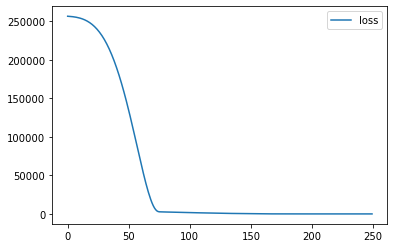

In [69]:
# We see that in decerases at the beginning very fast
# And there is a point (epoch) from which the decrease is not as fast
loss.plot()

### 3. Evaluating the Neural Network

In [70]:
# Evaluate the model: Compute the average loss for a new dataset = the test split
model.evaluate(X_test,y_test)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

32.39141565958659

In [71]:
# What about the traning split?
model.evaluate(X_train,y_train)

700/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

28.906118818010604

In [72]:
# Predict
predictions = model.predict(X_test)

In [73]:
# Regressed or fitted price predictions for the 2D test features set
predictions[:5]

array([[407.40372],
       [626.7118 ],
       [595.1684 ],
       [575.11127],
       [368.46985]], dtype=float32)

In [74]:
# We can create a dataframe for anaylizing the predictions
df_predictions = pd.DataFrame(predictions)
df_y_test = pd.DataFrame(y_test)

In [75]:
# Concatenate predictions and true values
df_predictions = pd.concat([df_predictions,df_y_test],axis=1)

In [76]:
df_predictions.columns = ['Y predicted','Y true']

In [77]:
df_predictions.head()

,Y predicted,Y true
0,407.403717,402.296319
1,626.711792,624.156198
2,595.168396,582.455066
3,575.111267,578.588606
4,368.469849,371.224104


<AxesSubplot:xlabel='Y true', ylabel='Y predicted'>

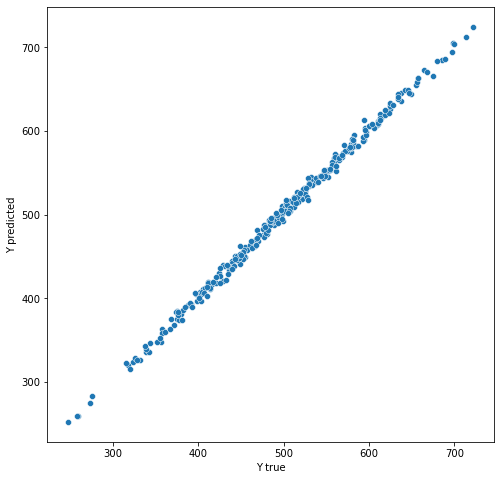

In [78]:
# Scatterplot: true vs prediction
plt.figure(figsize=(8,8))
sns.scatterplot(x='Y true',y='Y predicted',data=df_predictions)

<AxesSubplot:xlabel='Y difference', ylabel='Count'>

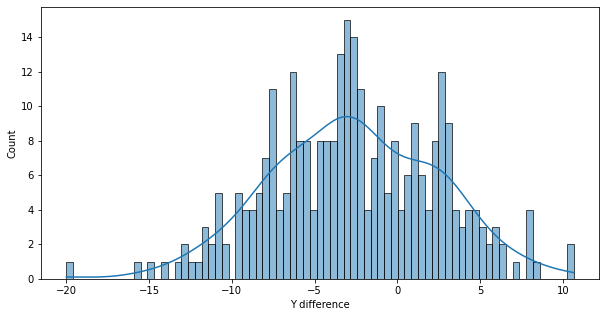

In [79]:
# Distribution of differences true - prediction
# Should be Gaussian, better centered in 0
df_predictions['Y difference'] = df_predictions['Y true'] - df_predictions['Y predicted']
plt.figure(figsize=(10,5))
sns.histplot(data=df_predictions['Y difference'],bins=75,kde=True)

In [80]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [81]:
# MAE: mean(abs(y_true-y_pred))
mean_absolute_error(y_test, predictions)

4.6290270787699255

In [82]:
# MSE: mean((y_true-y_pred)^2)
mean_squared_error(y_test, predictions)**0.5

5.691345754717083

In [83]:
# In order to decide wether we have good enough MAE & MSE
# We check how the price descriptives are: mean, min/max
# We see that for a distribution of mean,min,max = 500,220,775
# MAE of 4 is very good!
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


### 4. Inference

In [84]:
# If we want to infer the price of a new data point
# We need to give it the same form and scale
new_point = [[998,1000]]
new_point = scaler.transform(new_point)

In [85]:
# The predicted price of the new point
model.predict(new_point)

array([[421.8024]], dtype=float32)

### 5. Save and load model

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model.save('my_price_prediction_model.h5')

In [88]:
later_model = load_model('my_price_prediction_model.h5')

In [89]:
later_model.predict(new_point)

array([[421.8024]], dtype=float32)